# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.

NOTE: only one connection to COM port is possible at a time. Shut down other connections, either in python or dedicated software.

In [1]:
%matplotlib inline 

In [2]:
import importlib
import thr640
import imaging_tool
import spectral_shoot_single as sss
import spectral_shoot_time_variation

In [3]:
%run thr640.py
%run imaging_tool.py
%run spectral_shoot_single.py
%run spectral_shoot_time_variation.py

In [4]:
param = setup_camera()

In [5]:
import os

In [38]:
basepath = r'\\10.249.254.51\Public\BACK_UP\hashizuka\thesis(master)\data\Czerny'
if not os.path.exists(basepath):
    os.makedirs(basepath)

In [7]:
ccw_limit = 0
cw_limit = 1030000

# Single

In [39]:
# settings
date = 20241227
# exposure = 100 # Set the exposure time(ms)
target = "halpha"
vbin = 1 # Set vertical binning
tag="" # Set the tag name (option)


name=(f"{date}_{target}") # Set the filename to save
counts = {
    'halpha': 399000,
    'hbeta': 583000,
    'hgamma': 632000,
}

param.update({
    'basepath': basepath,
    'name': name,
    'exposure': 100,
    'tag': tag,
    'count': counts[target],
    'vbin': vbin,
})

In [52]:
param["count"] = counts["halpha"]
move_stepmotor(param)

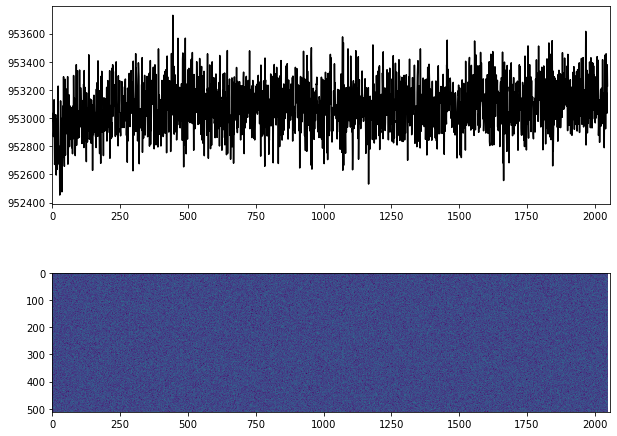

In [53]:
importlib.reload(sss)
param["exposure"] = 1000
param["tag"] = "halpha_bg"
sss.take_image(param)

In [54]:
param["count"] = counts["hbeta"]
move_stepmotor(param)

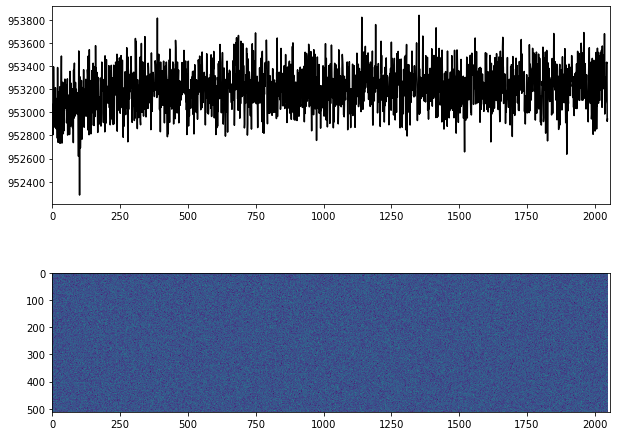

In [55]:
importlib.reload(sss)
param["exposure"] = 1000
param["tag"] = "hbeta_bg"
sss.take_image(param)

In [56]:
param["count"] = counts["hgamma"]
move_stepmotor(param)

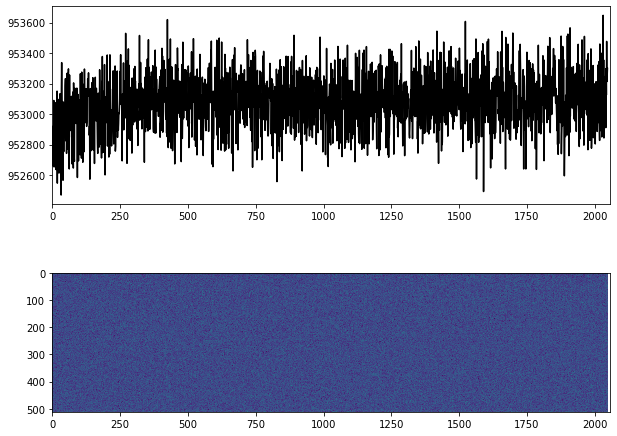

In [57]:
importlib.reload(sss)
param["exposure"] = 1000
param["tag"] = "hgamma_bg"
sss.take_image(param)

# Time variation

In [11]:
# # settings
# date = 20241227
# exposure = 100 # Set the exposure time(ms)
# target = "halpha"
# vbin = 1 # Set vertical binning
# tag="" # Set the tag name (option)


# name=(f"{date}_{target}_{exposure}ms") # Set the filename to save
# counts = {
#     'halpha': 399000,
#     'hbeta': 583000,
#     'hgamma': 632000,
# }

# param.update({
#     'basepath': basepath,
#     'name': name,
#     'exposure': exposure,
#     'tag': tag,
#     'count': counts[target],
#     'vbin': vbin,
# })

# # Hα輝線の位置を特定（最大値の位置をHα輝線と仮定）
# ha_pixel_position = read_peak(param)


In [12]:
# # settings
# date = 20241227
# exposure = 100 # Set the exposure time(ms)
# target = "halpha"
# vbin = 4 # Set vertical binning
# tag="1" # Set the tag name
# duration = 50   # Set the measurement time


# name=(f"{date}_{target}_{exposure}ms") # Set the filename to save
# counts = {
#     'halpha': 399000,
#     'hbeta': 583000,
#     'hgamma': 632000,
# }

# param.update({
#     'basepath': basepath,
#     'name': name,
#     'exposure': exposure,
#     'tag': tag,
#     'count': counts[target],
#     'vbin': vbin,
#     'duration': duration,
#     'ha_pixel_position': ha_pixel_position,
# })

# take_spectrum_time_variation(param)